[*********************100%***********************]  1 of 1 completed
       Count_Open  Count_High  Count_Low  Count_Close  Count_Sum
20.0         27.0        20.0       25.0         23.0       95.0
21.0         19.0        28.0       12.0         20.0       79.0
44.0         11.0        16.0       12.0         12.0       51.0
46.0         12.0        15.0       14.0          8.0       49.0
42.0         15.0         7.0       13.0         13.0       48.0
...           ...         ...        ...          ...        ...
102.0         0.0         0.0        0.0          1.0        1.0
101.0         0.0         0.0        1.0          0.0        1.0
88.0          1.0         0.0        0.0          0.0        1.0
62.0          0.0         0.0        0.0          1.0        1.0
160.0         0.0         1.0        0.0          0.0        1.0

[137 rows x 5 columns]


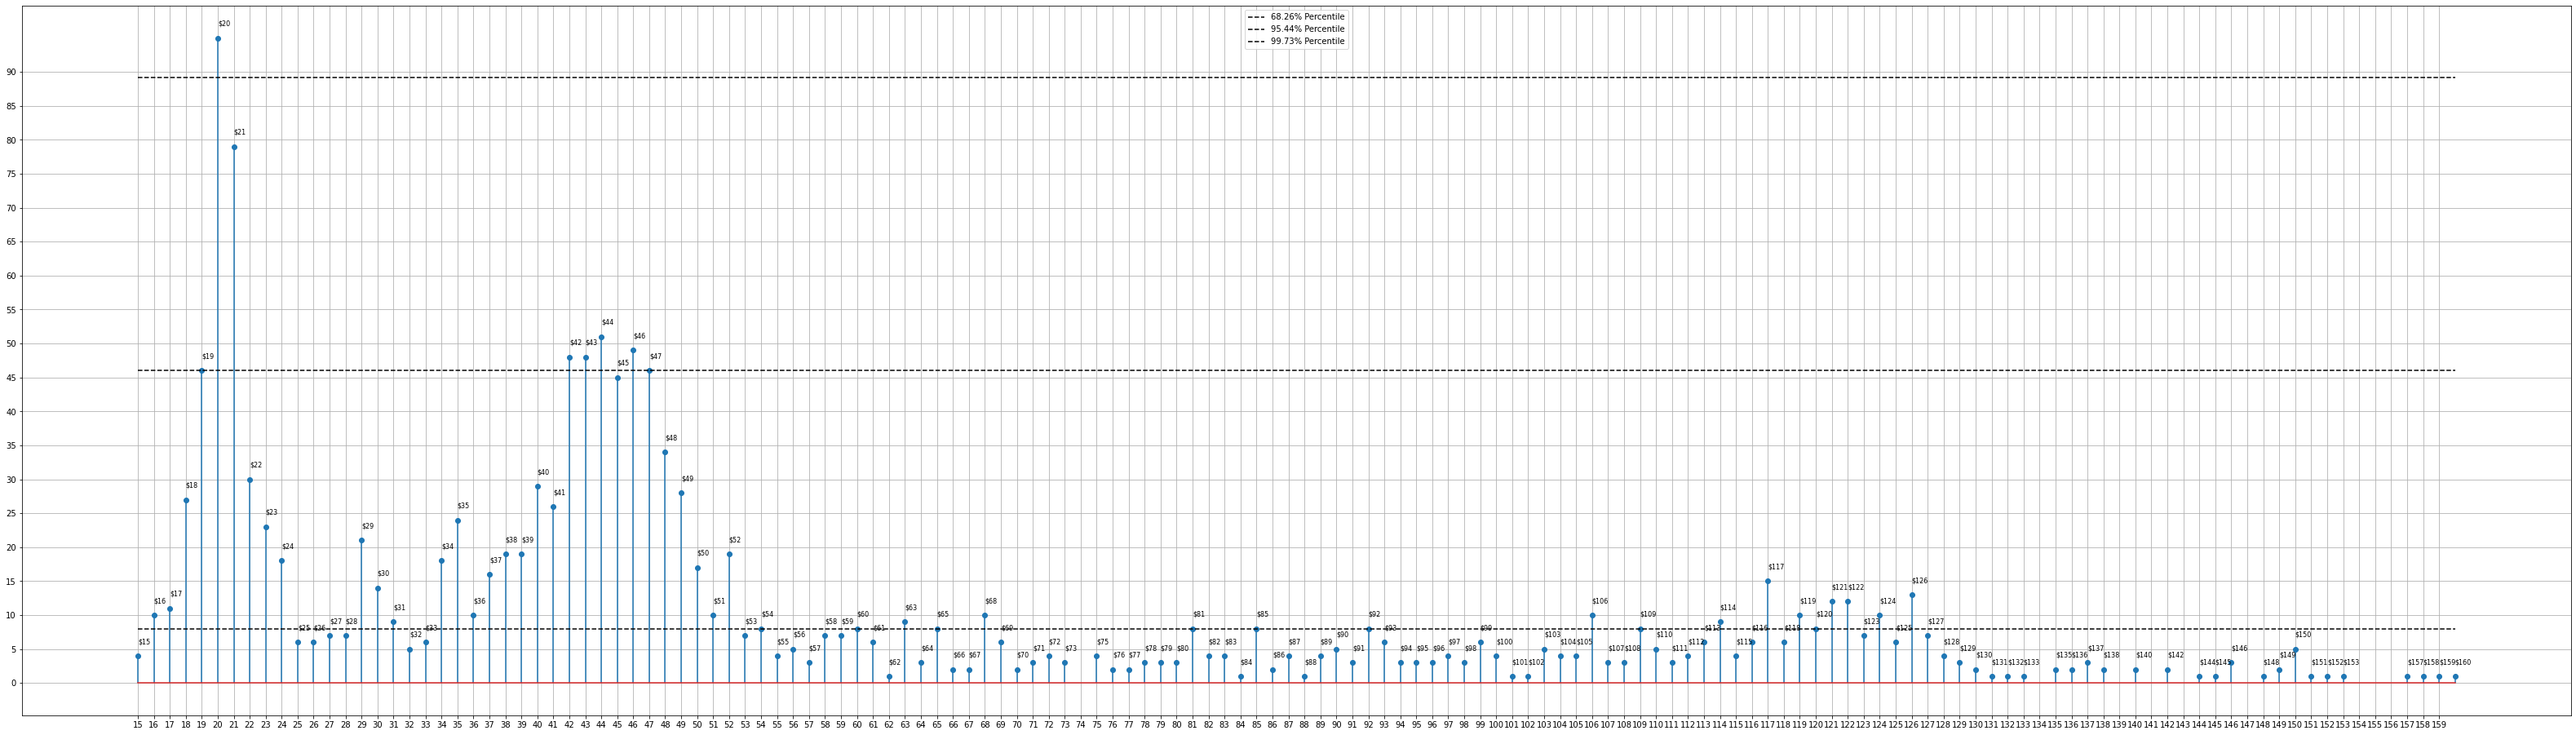

In [106]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy import stats

def GetStockData(ticker,start_date,end_date,interval):
    df = yf.download(ticker, start_date, end_date,interval=interval).dropna()
    return(df)

def Round(df,base):
    df = base*round(df/base)
    return(df)

def GroupOHLC(df):
    df['Date']=df.index
    
    #Group by individual OHLC columns
    dfo=pd.DataFrame(df.groupby('Open').count().sort_values(by='Date',ascending=False).Date)
    dfh=pd.DataFrame(df.groupby('High').count().sort_values(by='Date',ascending=False).Date)
    dfl=pd.DataFrame(df.groupby('Low').count().sort_values(by='Date',ascending=False).Date)
    dfc=pd.DataFrame(df.groupby('Close').count().sort_values(by='Date',ascending=False).Date)
    
    #Join OHLC columns
    df=dfo.join(dfh,how='outer',rsuffix='o',sort=True)
    df=df.join(dfl,how='outer',rsuffix='h',sort=True)
    df=df.join(dfc,how='outer',rsuffix='l',sort=True).fillna(0)
    
    #Sum and name OHLC columns
    df['total']=df.sum(axis=1)
    df.columns=['Count_Open','Count_High','Count_Low','Count_Close','Count_Sum']
    df=df.sort_values(by='Count_Sum',ascending=False)
    return(df)

def PlotData(df):
    #Plot Stem-plot
    fig, ax = plt.subplots()
    plt.stem(df.index,df.Count_Sum)
    #Add Grid
    ax.grid()
    #Resize
    fig.set_size_inches(56, 16)
    #Add X-ticks
    ax.xaxis.set_ticks(np.arange(np.min(df.index),np.max(df.index),1))
    #Add Y-ticks
    ax.yaxis.set_ticks(np.arange(0,np.max(df.Count_Sum),5))
    
    #Add lables
    for x,y in zip(df.index,df.Count_Sum):

        label = "${:.0f}".format(x)

        plt.annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,15), # distance from text to points (x,y)
                     fontsize=8,
                     ha='left') # horizontal alignment can be left, right or center
        
    #Add Percentile Lines
    Sigma_1=np.percentile(df.Count_Sum,68.26)
    Sigma_2=np.percentile(df.Count_Sum,95.44)
    Sigma_3=np.percentile(df.Count_Sum,99.73)
    ax.plot([np.min(df.index),np.max(df.index)],[Sigma_1,Sigma_1],'--k',label='68.26% Percentile')
    ax.plot([np.min(df.index),np.max(df.index)],[Sigma_2,Sigma_2],'--k',label='95.44% Percentile')
    ax.plot([np.min(df.index),np.max(df.index)],[Sigma_3,Sigma_3],'--k',label='99.73% Percentile')
    leg = plt.legend(loc='upper center')
ticker="ARKK"
start_date="2015-08-31"
end_date="2022-06-08"
interval="1wk"    
base=1



df=GetStockData(ticker,start_date,end_date,interval)
df=Round(df,base)
df=GroupOHLC(df)
PlotData(df)



print(df)